### Uso de técnicas de machine learning para la identificación de Perfiles Educativos y Sociales en el ámbito de la Educación Superior

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import prince  # Para análisis de correspondencia múltiple (MCA)

# Carga el dataset
df_agregado = pd.read_excel("base_matricula_datosabiertos.xlsx", engine='openpyxl')
df_agregado

,AÑO,CODIGO_IES,CODIGO_CARRERA,TIPO_SEDE,PROVINCIA_SEDE,CANTON_SEDE,SEXO,ETNIA,PUEBLOS_NACIONALIDAD,DISCAPACIDAD,...,CANTON_RESIDENCIA,NOMBRE_IES,TIPO_FINANCIAMIENTO,NOMBRE_CARRERA,CAMPO_AMPLIO,CAMPO_ESPECIFICO,CAMPO_DETALLADO,NIVEL_FORMACIÓN,MODALIDAD,tot
0,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,FISICA_MOTORA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
1,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,15
2,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,...,NO_REGISTRA,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
3,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,HOMBRE,NO_REGISTRA,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,1
4,2020,1001,00002,MATRIZ,PICHINCHA,QUITO,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA AGROINDUSTRIAL,"AGRICULTURA, SILVICULTURA, PESCA Y VETERINARIA","AGRICULTURA, SILVICULTURA Y PESCA",SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399171,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,CHONE,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,1
399172,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,LA JOYA DE LOS SACHAS,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,1
399173,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,PASTAZA,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,3
399174,2022,3027,750114K01A-H-0907,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,...,QUITO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA,5


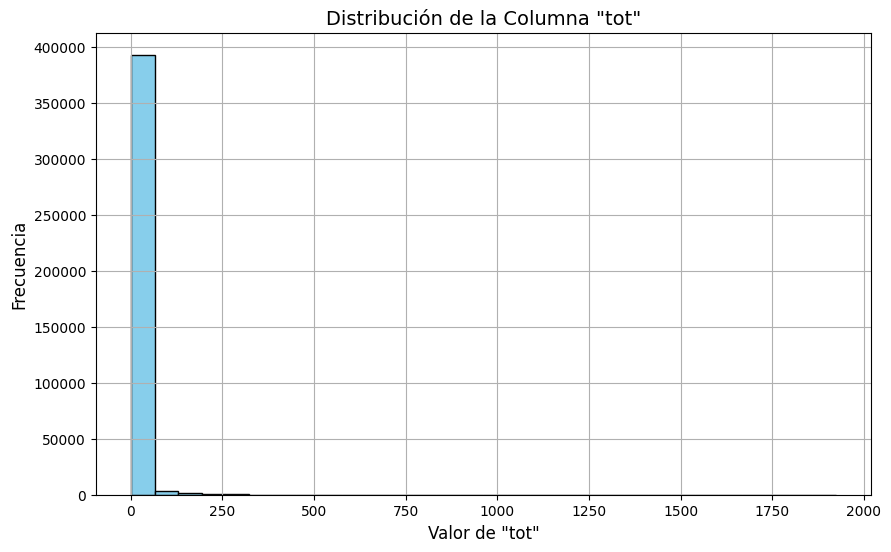

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que la columna 'tot' esté en formato numérico
df_agregado['tot'] = pd.to_numeric(df_agregado['tot'], errors='coerce')

# Crear un histograma para visualizar la distribución de "tot"
plt.figure(figsize=(10, 6))
plt.hist(df_agregado['tot'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Columna "tot"', fontsize=14)
plt.xlabel('Valor de "tot"', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()


In [6]:
# Filtrar las filas donde la columna 'AÑO' sea igual a 2022
df_base = df_agregado[df_agregado["AÑO"] == 2022]
df_base

# Se convierte la columna 'tot' a enteros
df_base['tot'] = df_base['tot'].astype(int)

# Desagregamos el dataset utilizando la función repeat y luego reseteamos el índice
df = df_base.loc[df_base.index.repeat(df_base['tot'])].reset_index(drop=True)

#Columnas a eliminar
columns=['tot', 'AÑO', 'CODIGO_CARRERA', ]

# Eliminamos la columna 'tot' del dataframe desagregado
df = df.drop(columns=columns)

df

C:\Users\luis.baca\AppData\Local\Temp\ipykernel_43444\2117899398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['tot'] = df_base['tot'].astype(int)


,CODIGO_IES,TIPO_SEDE,PROVINCIA_SEDE,CANTON_SEDE,SEXO,ETNIA,PUEBLOS_NACIONALIDAD,DISCAPACIDAD,PAIS_NACIONALIDAD,PAIS_RESIDENCIA,PROVINCIA_RESIDENCIA,CANTON_RESIDENCIA,NOMBRE_IES,TIPO_FINANCIAMIENTO,NOMBRE_CARRERA,CAMPO_AMPLIO,CAMPO_ESPECIFICO,CAMPO_DETALLADO,NIVEL_FORMACIÓN,MODALIDAD
0,1001,MATRIZ,PICHINCHA,QUITO,HOMBRE,BLANCO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y D...",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL
1,1001,MATRIZ,PICHINCHA,QUITO,HOMBRE,INDIGENA,KICHWA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y D...",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL
2,1001,MATRIZ,PICHINCHA,QUITO,HOMBRE,INDIGENA,OTAVALO,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y D...",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL
3,1001,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y D...",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL
4,1001,MATRIZ,PICHINCHA,QUITO,HOMBRE,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,ESCUELA POLITECNICA NACIONAL,PUBLICA,INGENIERIA EN CIENCIAS ECONOMICAS Y FINANCIERAS,"CIENCIAS SOCIALES, PERIODISMO, INFORMACION Y D...",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,SIN REGISTRO,TERCER NIVEL O PREGRADO,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792525,3027,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA
792526,3027,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA
792527,3027,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,PICHINCHA,QUITO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA
792528,3027,MATRIZ,GUAYAS,DURAN,MUJER,MESTIZO,NO_APLICA,NINGUNA,ECUADOR,ECUADOR,SANTO DOMINGO DE LOS TSACHILAS,SANTO DOMINGO,UNIVERSIDAD BOLIVARIANA DEL ECUADOR,PARTICULAR AUTOFINANCIADA,PEDAGOGIA DE LA CULTURA FISICA,EDUCACION,EDUCACION,FORMACION PARA DOCENTES CON ASIGNATURAS DE ESP...,CUARTO NIVEL O POSGRADO,HIBRIDA


Frecuencia en la columna CODIGO_IES:
CODIGO_IES
1006    69977
1031    56985
1024    53682
1005    46445
1009    35997
        ...  
1044      885
1068      673
1053      500
1057      430
3013       68
Name: count, Length: 62, dtype: int64 

Frecuencia en la columna TIPO_SEDE:
TIPO_SEDE
MATRIZ       705934
EXTENSION     86596
Name: count, dtype: int64 

Frecuencia en la columna PROVINCIA_SEDE:
PROVINCIA_SEDE
GUAYAS                            207192
PICHINCHA                         167297
MANABI                             85438
LOJA                               74509
AZUAY                              47275
TUNGURAHUA                         32214
CHIMBORAZO                         30915
LOS RIOS                           26653
IMBABURA                           22429
COTOPAXI                           19019
EL ORO                             14855
ESMERALDAS                         13263
SANTA ELENA                        11526
CAÑAR                              11383
BOLIVAR       

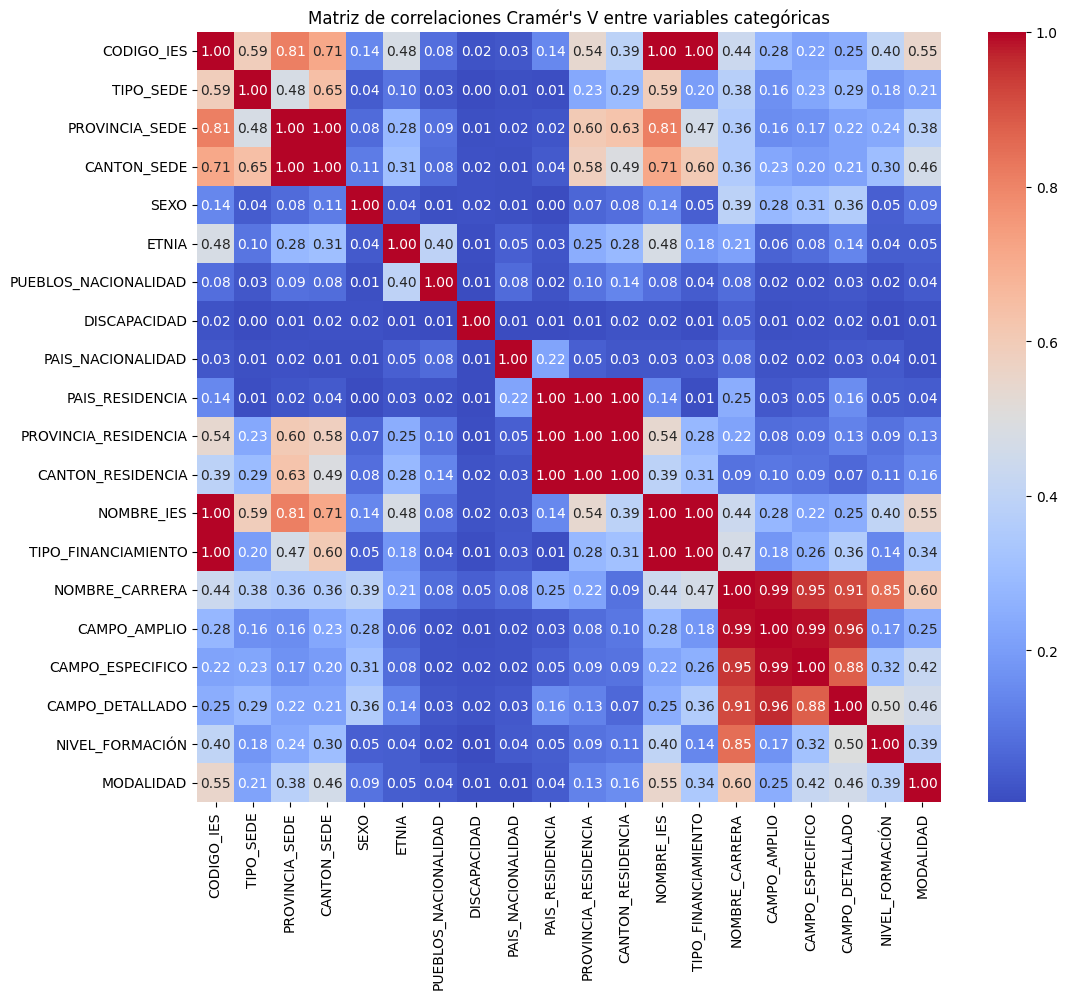

In [7]:
#Exploración inicial

# 1. Tablas de frecuencias: revisa la distribución de categorías
for col in df.columns:
    print(f"Frecuencia en la columna {col}:")
    print(df[col].value_counts(), "\n")

# 2. Cálculo de correlaciones entre variables categóricas usando Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Cálculo de Cramér's V entre todas las variables categóricas
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertimos la matriz a tipo float
corr_matrix = corr_matrix.astype(float)

# 3. Visualiza la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de correlaciones Cramér's V entre variables categóricas")
plt.show()



In [9]:
# 4. Análisis de Correspondencia Múltiple (MCA)
# Crear una muestra aleatoria del 10% del dataset
df_sample = df.sample(frac=0.50, random_state=42).reset_index(drop=True)

import matplotlib.pyplot as plt

# Ajustar MCA en la muestra
mca = prince.MCA(n_components=2)
mca_result = mca.fit(df_sample)

# Obtener las coordenadas de los componentes principales
row_coords = mca.row_coordinates(df_sample)
column_coords = mca.column_coordinates(df_sample)

# Graficar los resultados manualmente
plt.figure(figsize=(12, 8))

# Graficar los puntos correspondientes a las filas
plt.scatter(row_coords[0], row_coords[1], label='Filas', alpha=0.6)

# Graficar los puntos correspondientes a las columnas
plt.scatter(column_coords[0], column_coords[1], label='Columnas', alpha=0.6, color='red')


# Personalizar el gráfico
plt.title("Análisis de Correspondencia Múltiple (MCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


MemoryError: Unable to allocate 5.49 GiB for an array with shape (396265, 1861) and data type float64

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(row_coords)

# Ahora calcula las distancias entre los centroides
centroids = kmeans.cluster_centers_
distancias_centroides = pairwise_distances(centroids)
distancias_centroides



NameError: name 'pairwise_distances' is not defined

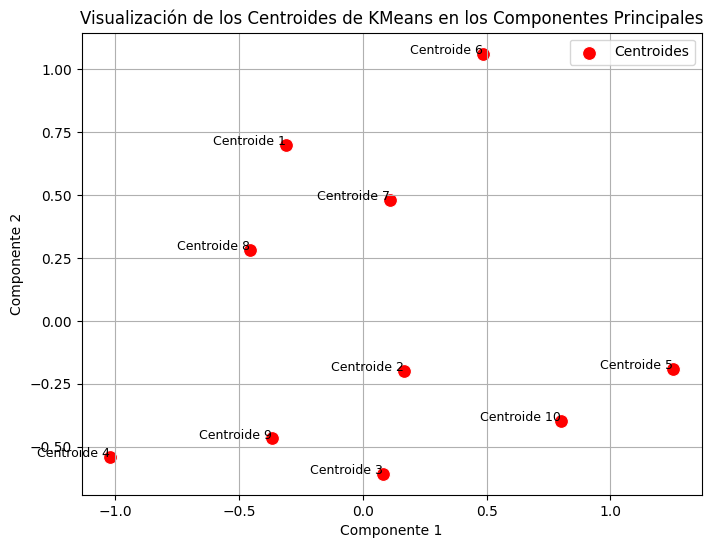

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear un DataFrame de los centroides para facilitar la visualización
centroides_df = pd.DataFrame(centroids, columns=['Componente 1', 'Componente 2'])

# Crear la figura y los ejes
plt.figure(figsize=(8, 6))

# Usar seaborn para una mejor estética
sns.scatterplot(x='Componente 1', y='Componente 2', data=centroides_df, s=100, color='red', label='Centroides')

# Añadir etiquetas para cada centroide
for i, (x, y) in enumerate(zip(centroids[:, 0], centroids[:, 1])):
    plt.text(x, y, f'Centroide {i+1}', fontsize=9, ha='right')

# Ajustes estéticos
plt.title('Visualización de los Centroides de KMeans en los Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


Los centroides están bastante dispersos en el plano. Esta dispersión indica que los clústeres están bien diferenciados entre sí en este espacio.Los centroides 1, 7, y 9 están relativamente cerca entre sí, lo que sugiere que las observaciones en estos clústeres podrían ser similares en términos de las dimensiones capturadas por el MCA. Por otro lado el centroide 6 y el 5, están bastante alejados del resto, lo que sugiere que estos clústeres contienen observaciones que son más diferentes de los demás en los componentes principales. 

In [26]:
from sklearn.metrics import silhouette_score

# row_coords contiene las coordenadas de las filas obtenidas del MCA
# clusters contiene las etiquetas de clúster asignadas por KMeans

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(row_coords, clusters)

print(f"Silhouette Score Promedio: {silhouette_avg}")


Silhouette Score Promedio: 0.36867180474011124


In [1]:
from sklearn.cluster import AgglomerativeClustering

# Clustering jerárquico
agglo = AgglomerativeClustering(n_clusters=10)
clusters_agglo = agglo.fit_predict(row_coords)

# Calcular Silhouette Score para Agglomerative Clustering
silhouette_avg_agglo = silhouette_score(row_coords, clusters_agglo)
print(f"Silhouette Score Promedio (Agglomerative Clustering): {silhouette_avg_agglo}")



NameError: name 'row_coords' is not defined